# Import librairies

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display # check outliers

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_selection import chi2

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
import numpy as np
np.random.seed(1337)
import json, re, nltk, string
from nltk.corpus import wordnet
from gensim.models import Word2Vec
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, merge
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics.pairwise import cosine_similarity

from keras.layers import BatchNormalization, Concatenate
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


In [7]:
# import spacy
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords

In [8]:
from sklearn.utils import resample # gerer resampling : oversampling or downsampling

In [111]:
from textblob import TextBlob  # to process polarity, subjectivity, len(sentence)

In [171]:
from keras import backend as K
from keras.engine.topology import Layer # for Attention
from keras import initializers, regularizers, constraints

In [179]:
from keras.utils import plot_model  # draw model keras

In [9]:
import spacy  # deep learning and Spacy Models to embeddings

In [10]:
# !python -m spacy download en_core_web_lg

  Running setup.py install for en-core-web-lg: started
    Running setup.py install for en-core-web-lg: finished with status 'done'
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [10]:
nlp = spacy.load('en_core_web_lg')

In [11]:
# Function to clean data, tokenize, remove stopwords, and not alphanumeric from raw training data
def black_txt(token):
    return token not in stop_words and token not in list(string.punctuation) and len(token) > 2

def clean_txt(text):
    clean_text = []
    clean_text2 = []
    
    text = re.sub("'","", text)
    text = re.sub("(\\d|\\W)+"," ",text) # replace \d: équivalent à [0-9]; 
        # \W: Valide tout caractère qui n'est pas un caractère de mot
    
    clean_text = [wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    
    return " ".join(clean_text2)

In [112]:
# fonctions utilitaires
def polarity_txt(text):
  return TextBlob(text).sentiment[0]

def subj_txt(text):
  return  TextBlob(text).sentiment[1]

def len_text(text):
  if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
  else:
         return 0

# EDA

In [16]:
# Load data
df = pd.read_csv('data/mozilla_thunderbird.csv')

In [27]:
df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time
0,35689,P3,Message Reader UI,NaN,Newsgroup postings dont linkify newsgroup head...,Using 2000-04-12 m15 commercial builds; ; This...,RESOLVED,FIXED,unspecified,2000-04-12 17:25:04 -0700,2010-05-13 07:53:25 -0700
1,36836,--,General,NaN,mail conduit for the palm devices,At present; there is no conduit available for ...,RESOLVED,WONTFIX,unspecified,2000-04-22 12:00:39 -0700,2012-07-02 05:13:49 -0700
2,51181,--,Mail Window Front End,NaN,User notification of no new mail needed in sta...,From Bugzilla Helper:; User-Agent: Mozilla/5.0...,RESOLVED,WORKSFORME,Trunk,2000-09-02 11:44:34 -0700,2009-08-26 09:39:21 -0700
3,58140,--,General,NaN,save multiple messages as individual files in ...,In the MailNews file menu there is a Save As s...,RESOLVED,FIXED,unspecified,2000-10-26 15:57:01 -0700,2011-10-26 22:48:36 -0700
4,67219,--,Mail Window Front End,NaN,Disable filters menu item when no accounts are...,NaN,RESOLVED,FIXED,Trunk,2001-01-31 13:03:14 -0800,2010-06-27 09:42:42 -0700


In [13]:
df.Resolution.value_counts()

DUPLICATE     12501
FIXED          5703
WORKSFORME     4919
INCOMPLETE     3732
INVALID        3559
EXPIRED        1407
WONTFIX         730
Name: Resolution, dtype: int64

In [14]:
df.Status.value_counts()

RESOLVED    30278
VERIFIED     2273
Name: Status, dtype: int64

In [17]:
df['StatusResolution'] = df['Status'] + '_' + df['Resolution']

In [18]:
df.StatusResolution.value_counts()

RESOLVED_DUPLICATE     11450
RESOLVED_FIXED          5009
RESOLVED_WORKSFORME     4733
RESOLVED_INCOMPLETE     3708
RESOLVED_INVALID        3271
RESOLVED_EXPIRED        1405
VERIFIED_DUPLICATE      1051
RESOLVED_WONTFIX         702
VERIFIED_FIXED           694
VERIFIED_INVALID         288
VERIFIED_WORKSFORME      186
VERIFIED_WONTFIX          28
VERIFIED_INCOMPLETE       24
VERIFIED_EXPIRED           2
Name: StatusResolution, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32551 entries, 0 to 32550
Data columns (total 12 columns):
Issue_id            32551 non-null int64
Priority            32551 non-null object
Component           32551 non-null object
Duplicated_issue    12501 non-null float64
Title               32551 non-null object
Description         32501 non-null object
Status              32551 non-null object
Resolution          32551 non-null object
Version             32551 non-null object
Created_time        32551 non-null object
Resolved_time       32551 non-null object
StatusResolution    32551 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 3.0+ MB


In [18]:
df.describe()

,Issue_id,Duplicated_issue
count,32551.000000,12501.000000
mean,447567.353138,337756.457163
std,169923.289989,185447.236277
min,35689.000000,2654.000000
25%,306819.500000,218999.000000
50%,407940.000000,304045.000000
75%,545980.500000,466025.000000
max,955875.000000,955075.000000


In [19]:
df.groupby(['Status']).count()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Resolution,Version,Created_time,Resolved_time,StatusResolution
Status,,,,,,,,,,,
RESOLVED,30278,30278,30278,11450,30278,30234,30278,30278,30278,30278,30278
VERIFIED,2273,2273,2273,1051,2273,2267,2273,2273,2273,2273,2273


# Preprocessing raw data

In [29]:
df.columns  # Title, Description [features] | Status [labels]

Index(['Issue_id', 'Priority', 'Component', 'Duplicated_issue', 'Title',
       'Description', 'Status', 'Resolution', 'Version', 'Created_time',
       'Resolved_time', 'StatusResolution'],
      dtype='object')

In [19]:
# col = ['Title', 'Description', 'Status']
df['Content'] = df['Title'] + ' ' + df['Description']

df.head()

,Issue_id,Priority,Component,Duplicated_issue,Title,Description,Status,Resolution,Version,Created_time,Resolved_time,StatusResolution,Content
0,35689,P3,Message Reader UI,NaN,Newsgroup postings dont linkify newsgroup head...,Using 2000-04-12 m15 commercial builds; ; This...,RESOLVED,FIXED,unspecified,2000-04-12 17:25:04 -0700,2010-05-13 07:53:25 -0700,RESOLVED_FIXED,Newsgroup postings dont linkify newsgroup head...
1,36836,--,General,NaN,mail conduit for the palm devices,At present; there is no conduit available for ...,RESOLVED,WONTFIX,unspecified,2000-04-22 12:00:39 -0700,2012-07-02 05:13:49 -0700,RESOLVED_WONTFIX,mail conduit for the palm devices At present; ...
2,51181,--,Mail Window Front End,NaN,User notification of no new mail needed in sta...,From Bugzilla Helper:; User-Agent: Mozilla/5.0...,RESOLVED,WORKSFORME,Trunk,2000-09-02 11:44:34 -0700,2009-08-26 09:39:21 -0700,RESOLVED_WORKSFORME,User notification of no new mail needed in sta...
3,58140,--,General,NaN,save multiple messages as individual files in ...,In the MailNews file menu there is a Save As s...,RESOLVED,FIXED,unspecified,2000-10-26 15:57:01 -0700,2011-10-26 22:48:36 -0700,RESOLVED_FIXED,save multiple messages as individual files in ...
4,67219,--,Mail Window Front End,NaN,Disable filters menu item when no accounts are...,NaN,RESOLVED,FIXED,Trunk,2001-01-31 13:03:14 -0800,2010-06-27 09:42:42 -0700,RESOLVED_FIXED,NaN


In [113]:
df = df[['Content', 'StatusResolution']]

df.head()

,Content,StatusResolution
0,Newsgroup postings dont linkify newsgroup head...,RESOLVED_FIXED
1,mail conduit for the palm devices At present; ...,RESOLVED_WONTFIX
2,User notification of no new mail needed in sta...,RESOLVED_WORKSFORME
3,save multiple messages as individual files in ...,RESOLVED_FIXED
5,when sending mail; should first check no recip...,RESOLVED_FIXED


## Extra columns to meta_data

Next we are going to create some news variables columns to try to improve the quaity of our classifier, we will create: <br>
Polarity: to check the sentiment of the text <br>
Subjectivity: to check if text is objective or subjective <br>
The number of word in the text

In [114]:
df['polarity'] = df['Content'].apply(polarity_txt)
df['subjectivity'] = df['Content'].apply(subj_txt)
df['len_text'] = df['Content'].apply(len_text)
df.head(2)

,Content,StatusResolution,polarity,subjectivity,len_text
0,Newsgroup postings dont linkify newsgroup head...,RESOLVED_FIXED,0.070000,0.335000,0.256983
1,mail conduit for the palm devices At present; ...,RESOLVED_WONTFIX,0.233333,0.133333,0.395833


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433 entries, 0 to 32550
Data columns (total 5 columns):
Content             32433 non-null object
StatusResolution    32433 non-null object
polarity            32433 non-null float64
subjectivity        32433 non-null float64
len_text            32433 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [116]:
# remove null, keep not null 
df = df[pd.notnull(df['Content'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433 entries, 0 to 32550
Data columns (total 5 columns):
Content             32433 non-null object
StatusResolution    32433 non-null object
polarity            32433 non-null float64
subjectivity        32433 non-null float64
len_text            32433 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [117]:
# remove duplicate records
df = df.drop_duplicates()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433 entries, 0 to 32550
Data columns (total 5 columns):
Content             32433 non-null object
StatusResolution    32433 non-null object
polarity            32433 non-null float64
subjectivity        32433 non-null float64
len_text            32433 non-null float64
dtypes: float64(3), object(2)
memory usage: 1.5+ MB


In [118]:
df.groupby('StatusResolution').count()  # imbalanced

,Content,polarity,subjectivity,len_text
StatusResolution,,,,
RESOLVED_DUPLICATE,11384,11384,11384,11384
RESOLVED_EXPIRED,1405,1405,1405,1405
RESOLVED_FIXED,4982,4982,4982,4982
RESOLVED_INCOMPLETE,3705,3705,3705,3705
RESOLVED_INVALID,3262,3262,3262,3262
RESOLVED_WONTFIX,702,702,702,702
RESOLVED_WORKSFORME,4730,4730,4730,4730
VERIFIED_DUPLICATE,1048,1048,1048,1048
VERIFIED_EXPIRED,2,2,2,2


In [35]:
# df['Status'].value_counts()

KeyError: 'Status'

In [119]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', 
                        encoding='latin-1', ngram_range=(1,2),
                       stop_words='english')
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='latin-1', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 2), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=True,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [120]:
df.Content.count()  # 32501 features

32433

In [121]:
# display the feature
features = tfidf.fit_transform(df.Content)
features.shape  
# before: (32501, 74110)
# after removing duplicate: (32433, 73863)

KeyboardInterrupt: 

In [42]:
# labels = df.Status
labels = df.StatusResolution

In [43]:
len(labels)

32433

In [44]:
#  Train test splitting
# X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Status'], stratify=labels, test_size=0.1)

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,
#                                                     random_state=seed, stratify=y)

X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['StatusResolution'], stratify=labels, test_size=0.1)

In [45]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29189,), (3244,), (29189,), (3244,))

In [46]:
count_vect = CountVectorizer()

In [177]:
# chuyen X_train : count vectorize sang tfidf vectorize
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [178]:
# training a model
clf = MultinomialNB().fit(X_train_tfidf, y_train)
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [179]:
# Evaluation
# sent = ["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]
# sent = ['Newsgroup postings dont linkify newsgroup head...']
sent = ['implement mail back and forward there is now U...	']
print(clf.predict(count_vect.transform(sent)))

['RESOLVED_DUPLICATE']


In [180]:
# chuyen X_test : count vectorize sang tfidf vectorize
X_test_counts = count_vect.fit_transform(X_test)
tfidf_transformer = TfidfTransformer()
X_test_tfidf = tfidf_transformer.fit_transform(X_test_counts)

In [47]:
# splitting train, test from features and labels
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, 
                                                                                 df.index, test_size=0.33, 
                                                                                 random_state=0, stratify=labels)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[2608   71  268  258  160    6  361   17    0    7    0    0    0    1]
 [ 229   87   17   32   24    0   72    3    0    0    0    0    0    0]
 [ 433   14  986   35   40    5  118    1    0   12    0    0    0    0]
 [ 533   17   29  329  120    1  190    1    0    1    1    1    0    0]
 [ 522   19  109  169  138    2  107    6    0    0    0    4    0    0]
 [ 123    6   51    6   19    5   21    0    0    1    0    0    0    0]
 [ 756   45  164  188  111    1  285    2    0    8    1    0    0    0]
 [ 221    5   26   12   14    2   36   27    0    3    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [  70    2  100    3   13    1   33    3    0    3    0    0    0    0]
 [   3    0    0    2    1    0    1    0    0    0    0    0    0    0]
 [  45    6    6   12   15    0    7    1    0    0    0    2    0    0]
 [   5    0    1    0    1    0    2    0    0    0    0    0    0    0]
 [  30    4    8    2    6    0   10    1    0    0

In [184]:
# heatmap
# fig, ax = plt.subplots(figsize=(10,10))

# sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=df.StatusResolution.values, yticklabels=df.StatusResolution.values)
# plt.ylabel('Actual')
# plt.xlabel('Predicted')
# plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000002115BD8EAE8> (for post_execute):


KeyboardInterrupt: 

In [49]:
# Display the classification report
# print(metrics.classification_report(y_test, y_pred, target_names=df['Status'].unique()))
print(metrics.classification_report(y_test, y_pred, target_names=df['StatusResolution'].unique()))

C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                     precision    recall  f1-score   support

     RESOLVED_FIXED       0.47      0.69      0.56      3757
   RESOLVED_WONTFIX       0.32      0.19      0.24       464
RESOLVED_WORKSFORME       0.56      0.60      0.58      1644
     VERIFIED_FIXED       0.31      0.27      0.29      1223
   RESOLVED_INVALID       0.21      0.13      0.16      1076
 RESOLVED_DUPLICATE       0.22      0.02      0.04       232
RESOLVED_INCOMPLETE       0.23      0.18      0.20      1561
VERIFIED_WORKSFORME       0.44      0.08      0.13       346
 VERIFIED_DUPLICATE       0.00      0.00      0.00         1
   VERIFIED_INVALID       0.09      0.01      0.02       228
   RESOLVED_EXPIRED       0.00      0.00      0.00         7
   VERIFIED_WONTFIX       0.29      0.02      0.04        94
   VERIFIED_EXPIRED       0.00      0.00      0.00         9
VERIFIED_INCOMPLETE       0.00      0.00      0.00        61

          micro avg       0.42      0.42      0.42     10703
          macro avg   

In [50]:
print(metrics.classification_report(y_test, y_pred, target_names=df['StatusResolution'].unique()))

C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\letan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                     precision    recall  f1-score   support

     RESOLVED_FIXED       0.47      0.69      0.56      3757
   RESOLVED_WONTFIX       0.32      0.19      0.24       464
RESOLVED_WORKSFORME       0.56      0.60      0.58      1644
     VERIFIED_FIXED       0.31      0.27      0.29      1223
   RESOLVED_INVALID       0.21      0.13      0.16      1076
 RESOLVED_DUPLICATE       0.22      0.02      0.04       232
RESOLVED_INCOMPLETE       0.23      0.18      0.20      1561
VERIFIED_WORKSFORME       0.44      0.08      0.13       346
 VERIFIED_DUPLICATE       0.00      0.00      0.00         1
   VERIFIED_INVALID       0.09      0.01      0.02       228
   RESOLVED_EXPIRED       0.00      0.00      0.00         7
   VERIFIED_WONTFIX       0.29      0.02      0.04        94
   VERIFIED_EXPIRED       0.00      0.00      0.00         9
VERIFIED_INCOMPLETE       0.00      0.00      0.00        61

          micro avg       0.42      0.42      0.42     10703
          macro avg   

In [188]:
accuracy_score(y_test, y_pred)

0.41749021070296477

## Change other classifier

In [189]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [190]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [191]:
# predict on test set
rfc_pred = rfc.predict(X_test)

In [192]:
accuracy_score(y_test, y_pred)

0.41749021070296477

In [194]:
print(metrics.classification_report(y_test, y_pred, target_names=df['StatusResolution'].unique()))

                     precision    recall  f1-score   support

     RESOLVED_FIXED       0.47      0.68      0.55      3778
   RESOLVED_WONTFIX       0.34      0.20      0.25       464
RESOLVED_WORKSFORME       0.55      0.62      0.58      1644
     VERIFIED_FIXED       0.32      0.28      0.30      1223
   RESOLVED_INVALID       0.23      0.13      0.16      1076
 RESOLVED_DUPLICATE       0.23      0.03      0.05       232
RESOLVED_INCOMPLETE       0.22      0.18      0.20      1561
VERIFIED_WORKSFORME       0.37      0.05      0.10       347
 VERIFIED_DUPLICATE       0.00      0.00      0.00         1
   VERIFIED_INVALID       0.17      0.03      0.05       228
   RESOLVED_EXPIRED       0.00      0.00      0.00         7
   VERIFIED_WONTFIX       0.56      0.09      0.16        95
   VERIFIED_EXPIRED       0.00      0.00      0.00         9
VERIFIED_INCOMPLETE       0.00      0.00      0.00        61

          micro avg       0.42      0.42      0.42     10726
          macro avg   

## downsampling-oversampling method

In [111]:
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Status'], test_size=0.1, random_state=27)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=27)

In [112]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

In [89]:
# separate minority and majority classes
verified = X[X.Status=='VERIFIED']
resolved = X[X.Status=='RESOLVED']

# RESOLVED    30234
# VERIFIED     2267

In [92]:
# upsampling minority
verified_upsampled = resample(verified, replace=True, n_samples=len(resolved), random_state=27)

In [94]:
len(verified_upsampled), len(verified), len(resolved)

(27219, 2031, 27219)

In [95]:
# combine both majority and upsampled minority
upsampled = pd.concat([resolved, verified_upsampled])

In [99]:
upsampled.Status.value_counts()

VERIFIED    27219
RESOLVED    27219
Name: Status, dtype: int64

In [102]:
y_train = upsampled.Status
X_train = upsampled.drop('Status', axis=1)

In [115]:
X_train.shape, y_train.shape

((29250,), (29250,))

In [113]:
# display the feature
features = tfidf.fit_transform(X_train)
features.shape  # (32501, 74110)

(29250, 67550)

In [121]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(features, y_train, test_size=0.33, 
                                                    random_state=0, stratify=y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [122]:
confusion_matrix(y_test, y_pred)

array([[8971,   12],
       [ 654,   16]], dtype=int64)

In [124]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    RESOLVED       0.93      1.00      0.96      8983
    VERIFIED       0.57      0.02      0.05       670

   micro avg       0.93      0.93      0.93      9653
   macro avg       0.75      0.51      0.51      9653
weighted avg       0.91      0.93      0.90      9653



In [125]:
accuracy_score(y_test, y_pred)

0.9310059049000311

## Generate synthetic samples

In [195]:
from imblearn.over_sampling import SMOTE

In [196]:
# X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['Status'], test_size=0.1, random_state=27)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=27)

X_train, X_test, y_train, y_test = train_test_split(df['Content'], df['StatusResolution'], test_size=0.1, random_state=27)

In [197]:
# display the feature
features = tfidf.fit_transform(X_train)
features.shape  # (32501, 74110)

(29250, 67550)

In [198]:
sm = SMOTE(random_state=27, ratio=1.0)

In [199]:
X_train, y_train = sm.fit_sample(features, y_train)

# ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

# Nhan xet: Ap dung cho binary classification only !!!

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [149]:
model = LinearSVC()
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, 
                                                    random_state=0, stratify=y_train)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [150]:
confusion_matrix(y_test, y_pred)

array([[8487,  496],
       [  11, 8971]], dtype=int64)

In [151]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    RESOLVED       1.00      0.94      0.97      8983
    VERIFIED       0.95      1.00      0.97      8982

   micro avg       0.97      0.97      0.97     17965
   macro avg       0.97      0.97      0.97     17965
weighted avg       0.97      0.97      0.97     17965



In [152]:
accuracy_score(y_test, y_pred)

0.9717784581129975

# Deep learning training

In [122]:
# get data, labels
X = df['Content']
y = df['StatusResolution']

In [123]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',

In [124]:
wn = WordNetLemmatizer() # wordNet lemmatizer

In [125]:
len(X), len(y)

(32433, 32433)

In [126]:
# encode the labels = classes
encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [127]:
encoder.classes_

array(['RESOLVED_DUPLICATE', 'RESOLVED_EXPIRED', 'RESOLVED_FIXED',
       'RESOLVED_INCOMPLETE', 'RESOLVED_INVALID', 'RESOLVED_WONTFIX',
       'RESOLVED_WORKSFORME', 'VERIFIED_DUPLICATE', 'VERIFIED_EXPIRED',
       'VERIFIED_FIXED', 'VERIFIED_INCOMPLETE', 'VERIFIED_INVALID',
       'VERIFIED_WONTFIX', 'VERIFIED_WORKSFORME'], dtype=object)

In [128]:
Y = np_utils.to_categorical(y)
len(Y[0]) # 14 classes

14

In [30]:
X[:2]

0    Newsgroup postings dont linkify newsgroup head...
1    mail conduit for the palm devices At present; ...
Name: Content, dtype: object

In [129]:
# create the tf-idf vector
vectorizer = TfidfVectorizer(min_df =3, max_df=0.2, max_features=None, 
                    strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
                    ngram_range=(1, 10), use_idf=1,smooth_idf=1,sublinear_tf=1,
                    stop_words = None, preprocessor=clean_txt)

## Split train-test datasets

In [130]:
seed = 40

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=y)

In [131]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25946,), (25946, 14), (6487,), (6487, 14))

In [132]:
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.2, max_features=None, min_df=3,
        ngram_range=(1, 10), norm='l2',
        preprocessor=<function clean_txt at 0x0000024548CB9400>,
        smooth_idf=1, stop_words=None, strip_accents='unicode',
        sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None, use_idf=1,
        vocabulary=None)

In [133]:
# Convert text to sequence
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()

def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    #print('\nwords = {}, length of tokenized words = {}'.format(words, len(words)))
    indexes = [index[word] for word in words if word in index]
    #print('\nindexes = {}, length of indexes = {}'.format(indexes, len(indexes)))
    return indexes

In [134]:
X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]

words = ['provide', 'additional', 'information', 'xpi', 'file', 'determine', 'application', 'load', 'user', 'agent', 'mozilla', 'windows', 'windows', 'gecko', 'firefox', 'build', 'identifier', 'mozilla', 'windows', 'windows', 'gecko', 'firefox', 'currently', 'instructions', 'way', 'file', 'could', 'open', 'correct', 'application', 'installation', 'process', 'would', 'much', 'simpler', 'instructions', 'page', 'proper', 'procedure', 'text', 'install', 'still', 'lead', 'user', 'click', 'rather', 'right', 'click', 'transparent', 'process', 'would', 'likely', 'appeal', 'two', 'recommendations', 'mime', 'type', 'extensions', 'application', 'xpinstall', 'thunderbird', 'see', 'bug', 'use', 'xpi', 'aware', 'install', 'tool', 'would', 'open', 'xpi', 'file', 'cause', 'instal', 'correct', 'application', 'assume', 'file', 'provide', 'enough', 'information', 'determine', 'application', 'use', 'reproducible', 'always', 'step', 'reproduce', 'visit', 'url', 'use', 'fire', 'fox', 'reference', 'thunderbird', 'xpi', 'extensions', 'click', 'install', 'link', 'actual', 'result', 'software', 'install', 'dialog', 'appear', 'allow', 'user', 'click', 'install', 'appear', 'install', 'extension', 'dialog', 'appear', 'tell', 'user', 'extension', 'compatible', 'firefox', 'expect', 'result', 'correctly', 'instal', 'extension', 'right', 'application', 'thunderbird', 'provide', 'list', 'instal', 'applications', 'could', 'install', 'extension', 'allow', 'user', 'install', 'allow', 'user', 'browse', 'installers', 'within', 'appropriate', 'application', 'successfully', 'install', 'bug', 'provide', 'information', 'error', 'message', 'guide', 'user', 'towards', 'determine', 'correct', 'application', 'procedure', 'change', 'install', 'link', 'save', 'extension', 'link', 'extensions', 'website', 'browser', 'compatible', 'xpi', 'file', 'allow', 'user', 'click', 'two', 'time', 'successive', 'button', 'call', 'install', 'inform', 'user', 'extension', 'cant', 'instal', 'use', 'thunderbird', 'firefox'], length of tokenized words = 188

indexes = [196152, 6722, 120343, 283964, 84913, 60585, 17038, 137720, 56102, 122152, 271668, 84913, 52480, 51985, 17038, 121648, 194064, 281461, 165283, 227241, 122152, 183968, 195693, 194039, 242917, 121391, 236531, 128524, 197642, 211543, 254059, 194064, 281461, 133811, 15447, 256181, 199880, 156460, 256534, 81522, 17038, 284002, 28010, 283964, 21958, 121391, 252825, 281461, 283964, 84913, 34504, 121140, 51985, 17038, 19095, 84913, 196152, 74659, 120343, 60585, 17038, 270603, 260515, 88528, 97026, 200139, 283964, 81522, 121391, 135093, 228952, 121391, 60912, 15448, 11036, 121391, 15448, 121391, 81398, 60912, 15448, 241902, 81398, 45179, 52170, 121140, 81398, 211543, 17038, 196152, 136759, 121140, 17335, 52480, 121391, 81398, 11036, 121391, 11036, 27740, 121785, 279479, 17970, 17038, 238455, 121391, 28010, 196152, 120343, 75646, 107825, 253749, 60585, 51985, 17038, 194039, 35616, 121391, 135093, 213454, 81398, 135093, 81522, 272188, 27786, 45179, 283964, 84913, 11036, 256181, 251443, 238503, 32188, 33015, 121391, 120335, 81398, 33525, 121140], length of indexes = 139

In [135]:
len(vectorizer.get_feature_names())  # total of nb_features = 285064

285064

In [136]:
max([len(s) for s in X_train_sequences])   # max sequence length = 2835

2835

Text(0, 0.5, '#examples')

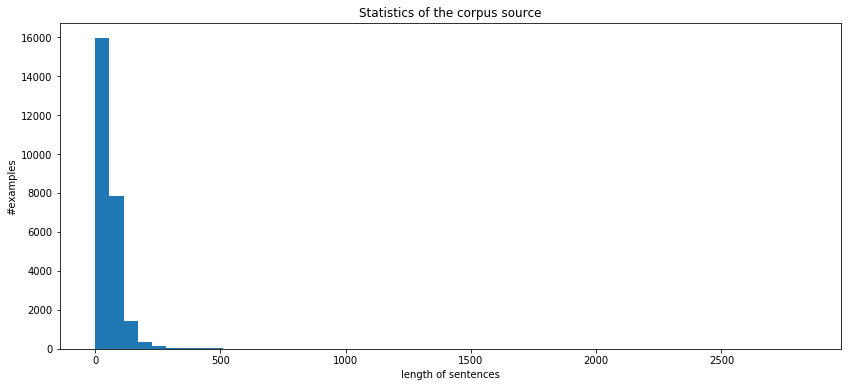

In [137]:
# import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.hist([len(s) for s in X_train_sequences], bins=50)
plt.title("Statistics of the corpus source")
plt.xlabel('length of sentences')
plt.ylabel('#examples')
#plt.show()

In [138]:
# Compute the max length of text
MAX_SEQ_LEN = 60

N_FEATURES = len(vectorizer.get_feature_names()) # total of nb_features = 285064

# pad sequences of the training dataset
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LEN, value=N_FEATURES)

print(X_train_sequences[0], len(X_train_sequences[0]))  # 60 indexes

[ 60912  15448 241902  81398  45179  52170 121140  81398 211543  17038
 196152 136759 121140  17335  52480 121391  81398  11036 121391  11036
  27740 121785 279479  17970  17038 238455 121391  28010 196152 120343
  75646 107825 253749  60585  51985  17038 194039  35616 121391 135093
 213454  81398 135093  81522 272188  27786  45179 283964  84913  11036
 256181 251443 238503  32188  33015 121391 120335  81398  33525 121140] 60


In [139]:
# pad sequences of the testing dataset
X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LEN, value=N_FEATURES)

Make the embedding with spacy 

In [140]:
# Embeddings
EMBEDDING_LEN = 300

embedding_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDING_LEN))

for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embedding_index[idx] = embedding
    except:
        pass
    
print("EMBEDDING_LEN = ", EMBEDDING_LEN)

EMBEDDING_LEN =  300


In [141]:
print("\nLength of embedding index = {} vectors found".format(len(embedding_index)))
# Length of embedding index = 285065 vectors found

# total of nb_features = 285064


Length of embedding index = 285065 vectors found


In [51]:
embedding_index[0], len(embedding_index[0])

(array([-1.03670001e-01, -9.90099981e-02, -8.29549972e-03, -4.36530001e-02,
         3.86209995e-01,  2.07190007e-01,  5.31940022e-03, -2.12950006e-01,
         1.25159994e-01,  2.61440009e-01, -3.98570001e-01,  1.76400006e-01,
        -1.00280002e-01,  1.92120001e-01, -2.83479989e-01,  7.23100007e-02,
        -3.43089998e-01,  8.05779994e-01, -5.89590013e-01,  5.73050022e-01,
         4.21749987e-02,  2.75610000e-01, -5.62699974e-01, -4.88750011e-01,
         3.57540011e-01, -6.52890027e-01, -2.20719993e-01, -1.51800007e-01,
        -1.68280005e-01, -4.17189986e-01,  5.26219979e-03, -7.44469985e-02,
         6.42900020e-02,  2.61680007e-01,  1.05710000e-01,  4.70140010e-01,
         4.36949998e-01,  3.72359991e-01,  3.52590010e-02,  5.83750010e-01,
         3.19189996e-01, -3.63809988e-02, -2.78109998e-01, -2.17820004e-01,
        -1.34029999e-01,  1.53940003e-02, -3.23170006e-01,  1.19659998e-01,
         3.42999995e-01,  1.71240002e-01, -2.82319993e-01,  2.07220003e-01,
        -2.8

## Simple LSMT

In [77]:
# CACH 1 : with Sequential()
model = Sequential()
model.add(Embedding(input_dim=len(vectorizer.get_feature_names()) + 1,
                   output_dim=EMBEDDING_LEN,
                   weights=[embedding_index],
                    input_length=MAX_SEQ_LEN,
                    trainable=False, name='embedding'  # trainable=False or True
                   ))
model.add(LSTM(300, dropout=0.2, name='LSTM'))
model.add(Dense(len(set(y)), activation='softmax', name='fc_output'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 60, 300)           85519500  
_________________________________________________________________
LSTM (LSTM)                  (None, 300)               721200    
_________________________________________________________________
fc_output (Dense)            (None, 14)                4214      
Total params: 86,244,914
Trainable params: 725,414
Non-trainable params: 85,519,500
_________________________________________________________________
None


In [78]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [79]:
# training the model
history = model.fit(X_train_sequences, y_train, validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 23351 samples, validate on 2595 samples
Epoch 1/20
 - 16s - loss: 1.8442 - acc: 0.3821 - val_loss: 1.7672 - val_acc: 0.4008
Epoch 2/20
 - 14s - loss: 1.7553 - acc: 0.4100 - val_loss: 1.7361 - val_acc: 0.4154
Epoch 3/20
 - 14s - loss: 1.7108 - acc: 0.4164 - val_loss: 1.7280 - val_acc: 0.4119
Epoch 4/20
 - 14s - loss: 1.6707 - acc: 0.4285 - val_loss: 1.7029 - val_acc: 0.4293
Epoch 5/20
 - 14s - loss: 1.6343 - acc: 0.4353 - val_loss: 1.7092 - val_acc: 0.4355
Epoch 6/20
 - 14s - loss: 1.5911 - acc: 0.4514 - val_loss: 1.7039 - val_acc: 0.4277
Epoch 7/20
 - 14s - loss: 1.5452 - acc: 0.4606 - val_loss: 1.7177 - val_acc: 0.4197
Epoch 8/20
 - 14s - loss: 1.4822 - acc: 0.4804 - val_loss: 1.7515 - val_acc: 0.4158
Epoch 9/20
 - 14s - loss: 1.4078 - acc: 0.5038 - val_loss: 1.7728 - val_acc: 0.4181
Epoch 10/20
 - 14s - loss: 1.3216 - acc: 0.5344 - val_loss: 1.8345 - val_acc: 0.3973
Epoch 11/20
 - 14s - loss: 1.2150 - acc: 0.5702 - val_loss: 1.

In [58]:
path_model_keras = 'models/LSTM.model'

In [94]:
# save the model
model.save(path_model_keras)

In [79]:
# reload the model
from tensorflow import keras
model = keras.models.load_model(path_model_keras)

In [78]:
# draw model 
plot_model(model, to_file='models/model_LSTM.png', show_shapes=True)

### Evaluation

In [80]:
# scores = model.evaluate(X_test_sequences, y_test, verbose=2)
score, acc = model.evaluate(X_test_sequences, y_test, verbose=2)

# print("Accuracy: %s" % scores[1])

# before: Accuracy: 0.3522534994799584
# after: Accuracy: 0.341452135057686

 - 9s - loss: 3.0056 - acc: 0.3415


In [87]:
# for model comparaison
list_result = []
print("Accuracy:", acc)  
list_result.append(("LSTM Simple - Testing", acc))
list_result

Accuracy: 0.34145212


[('LSTM Simple - Testing', 0.34145212)]

In [81]:
print('Test set')
print('test loss score = ', score)
print('test accuracy = ', acc)

Test set
test loss score =  3.0055620054333496
test accuracy =  0.34145212


In [82]:
score2, acc2 = model.evaluate(X_train_sequences, y_train, verbose=2)

 - 31s - loss: 0.3819 - acc: 0.9220


In [88]:
# Training
list_result.append(("LSTM Simple - Training", acc2))
list_result

[('LSTM Simple - Testing', 0.34145212), ('LSTM Simple - Training', 0.9220304)]

In [83]:
print('Training set')
print('test loss score = ', score2)
print('test accuracy = ', acc2)

Training set
test loss score =  0.38190102062623776
test accuracy =  0.9220304


### Draw graphic of performance

In [84]:
train_result = history.history

print(train_result.keys())

#  "Accuracy"
plt.figure(figsize=(14,8))
plt.plot(train_result['acc'])
plt.plot(train_result['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# "Loss"
plt.figure(figsize=(14,8))
plt.plot(train_result['loss'])
plt.plot(train_result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

NameError: name 'history' is not defined

## Model LSTM and concatenate new columns

In [95]:
from keras.models import Model
from keras.layers import Dense,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LEN,), name='text')
meta_data = Input(shape=(3,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDING_LEN,  # Embedding size
                    weights=[embedding_index],
                    input_length=MAX_SEQ_LEN,
                    trainable=False))(text_data)
x2 = ((LSTM(300, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model2 = Model(inputs=[text_data, meta_data], outputs=out)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model2.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 60)           0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 60, 300)      85519500    text[0][0]                       
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 300)          721200      embedding_3[0][0]                
__________________________________________________________________________________________________
meta (InputLayer)               (None, 3)            0                                            
__________________________________________________________________________________________________
concatenat

In [97]:
# draw model 
# from keras.utils import plot_model
plot_model(model2, to_file='models/model_LSTM_with_meta_data.png', show_shapes=True)

### Fit to the model with meta-data

In [143]:
df.head()

,Content,StatusResolution,polarity,subjectivity,len_text
0,Newsgroup postings dont linkify newsgroup head...,RESOLVED_FIXED,0.070000,0.335000,0.256983
1,mail conduit for the palm devices At present; ...,RESOLVED_WONTFIX,0.233333,0.133333,0.395833
2,User notification of no new mail needed in sta...,RESOLVED_WORKSFORME,0.116942,0.421488,0.402985
3,save multiple messages as individual files in ...,RESOLVED_FIXED,0.136224,0.295408,0.311475
5,when sending mail; should first check no recip...,RESOLVED_FIXED,0.011448,0.370875,0.369565


In [149]:
df.columns

Index(['Content', 'StatusResolution', 'polarity', 'subjectivity', 'len_text'], dtype='object')

In [154]:
# iloc: khong chay, loc: chay duoc !!!
df_cat_train = df.loc[x_train.index][['polarity', 'subjectivity', 'len_text']]
df_cat_test = df.loc[x_test.index][['polarity', 'subjectivity', 'len_text']]

In [152]:
len(x_train.index), len(x_test.index)  # (25946, 6487)

(25946, 6487)

In [153]:
type(df)

pandas.core.frame.DataFrame

In [155]:
df_cat_test.shape, df_cat_train.shape

((6487, 3), (25946, 3))

In [157]:
# training the model
history2 = model2.fit([X_train_sequences, df_cat_train], y_train, 
                     validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Train on 23351 samples, validate on 2595 samples
Epoch 1/20
 - 15s - loss: 1.9541 - acc: 0.3656 - val_loss: 1.8434 - val_acc: 0.3873
Epoch 2/20
 - 15s - loss: 1.7939 - acc: 0.3990 - val_loss: 1.7979 - val_acc: 0.3726
Epoch 3/20
 - 15s - loss: 1.7624 - acc: 0.4064 - val_loss: 1.7261 - val_acc: 0.4181
Epoch 4/20
 - 15s - loss: 1.7290 - acc: 0.4165 - val_loss: 1.7164 - val_acc: 0.4304
Epoch 5/20
 - 15s - loss: 1.7108 - acc: 0.4226 - val_loss: 1.7214 - val_acc: 0.4069
Epoch 6/20
 - 15s - loss: 1.6891 - acc: 0.4290 - val_loss: 1.6944 - val_acc: 0.4401
Epoch 7/20
 - 15s - loss: 1.6663 - acc: 0.4321 - val_loss: 1.7037 - val_acc: 0.4231
Epoch 8/20
 - 15s - loss: 1.6527 - acc: 0.4390 - val_loss: 1.7128 - val_acc: 0.4166
Epoch 9/20
 - 15s - loss: 1.6354 - acc: 0.4404 - val_loss: 1.7105 - val_acc: 0.4258
Epoch 10/20
 - 15s - loss: 1.6110 - acc: 0.4493 - val_loss: 1.7033 - val_acc: 0.4285
Epoch 11/20
 - 15s - loss: 1.5874 - acc: 0.4542 - val_loss: 1.7358 - val_acc: 0.4197
Epoch 12/20
 - 15s - loss

### Evaluation

In [158]:
score2, acc2 = model2.evaluate([X_test_sequences, df_cat_test], y_test, verbose=2)

print("Accuracy:", acc2)  
list_result.append(("LSTM with metadata - Testing", acc2))
list_result

Accuracy: 0.39525204256500834


[('LSTM Simple - Testing', 0.34145212),
 ('LSTM Simple - Training', 0.9220304),
 ('LSTM with metadata - Testing', 0.39525204256500834)]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


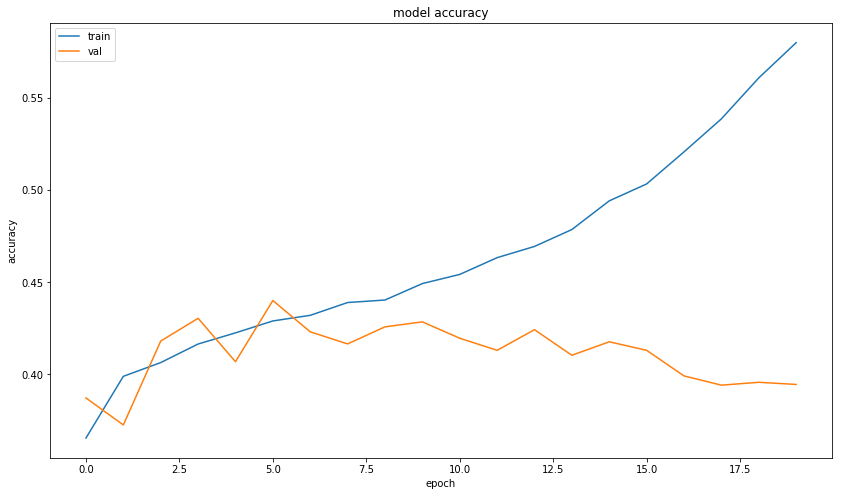

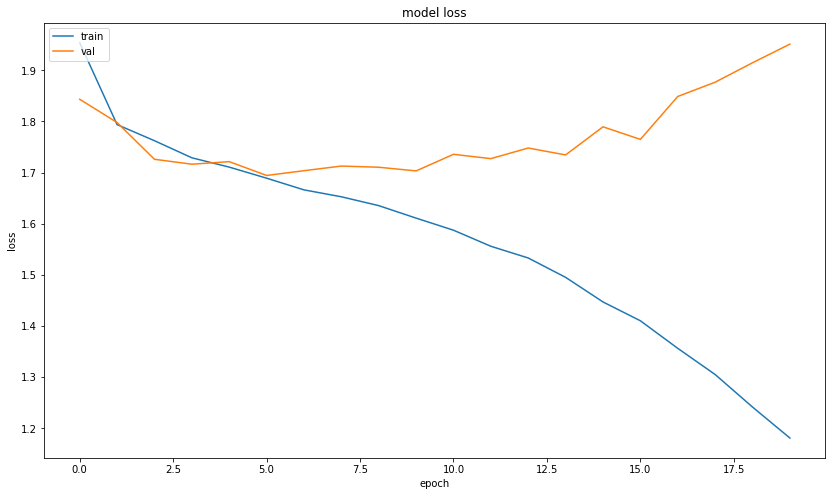

In [176]:
train_result = history2.history

print(train_result.keys())

#  "Accuracy"
plt.figure(figsize=(14,8))
plt.plot(train_result['acc'])
plt.plot(train_result['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# "Loss"
plt.figure(figsize=(14,8))
plt.plot(train_result['loss'])
plt.plot(train_result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model with bi-GRU 

### Design the architecture

In [161]:
text_data = Input(shape=(MAX_SEQ_LEN,), name='text')
meta_data = Input(shape=(3,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDING_LEN,  # Embedding size
                    weights=[embedding_index],
                    input_length=MAX_SEQ_LEN,
                    trainable=False))(text_data)
x2 = ((GRU(128, dropout=0.2, recurrent_dropout=0.2,  return_sequences=True)))(x)
x3 = ((GRU(128, dropout=0.2, recurrent_dropout=0.2)))(x2)
x4 = concatenate([x3, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model3 = Model(inputs=[text_data, meta_data], outputs=out)
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model3.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 60)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 60, 300)      85519500    text[0][0]                       
__________________________________________________________________________________________________
gru_3 (GRU)                     (None, 60, 128)      164736      embedding_5[0][0]                
__________________________________________________________________________________________________
gru_4 (GRU)                     (None, 128)          98688       gru_3[0][0]                      
__________________________________________________________________________________________________
meta (Inpu

In [180]:
# draw model 
plot_model(model3, to_file='models/model_biGRU.png', show_shapes=True)

### Training

In [162]:
# training the model
history3 = model3.fit([X_train_sequences, df_cat_train], y_train, 
                     validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Train on 23351 samples, validate on 2595 samples
Epoch 1/20
 - 28s - loss: 2.3249 - acc: 0.2753 - val_loss: 1.9030 - val_acc: 0.3699
Epoch 2/20
 - 25s - loss: 1.8433 - acc: 0.3807 - val_loss: 1.7623 - val_acc: 0.4015
Epoch 3/20
 - 26s - loss: 1.7811 - acc: 0.4030 - val_loss: 1.7338 - val_acc: 0.4158
Epoch 4/20
 - 25s - loss: 1.7467 - acc: 0.4126 - val_loss: 1.7233 - val_acc: 0.4185
Epoch 5/20
 - 26s - loss: 1.7250 - acc: 0.4196 - val_loss: 1.7191 - val_acc: 0.4197
Epoch 6/20
 - 25s - loss: 1.7117 - acc: 0.4218 - val_loss: 1.7123 - val_acc: 0.4131
Epoch 7/20
 - 26s - loss: 1.6954 - acc: 0.4249 - val_loss: 1.7129 - val_acc: 0.4216
Epoch 8/20
 - 25s - loss: 1.6744 - acc: 0.4341 - val_loss: 1.7035 - val_acc: 0.4173
Epoch 9/20
 - 25s - loss: 1.6615 - acc: 0.4372 - val_loss: 1.6845 - val_acc: 0.4351
Epoch 10/20
 - 25s - loss: 1.6444 - acc: 0.4403 - val_loss: 1.6864 - val_acc: 0.4328
Epoch 11/20
 - 25s - loss: 1.6308 - acc: 0.4459 - val_loss: 1.6878 - val_acc: 0.4281
Epoch 12/20
 - 25s - loss

### Eval

In [163]:
score3, acc3 = model3.evaluate([X_test_sequences, df_cat_test], y_test, verbose=2)

print("Accuracy:", acc3)  
list_result.append(("bi-GRU with metadata - Testing", acc3))
list_result

Accuracy: 0.40218899331622815


[('LSTM Simple - Testing', 0.34145212),
 ('LSTM Simple - Training', 0.9220304),
 ('LSTM with metadata - Testing', 0.39525204256500834),
 ('bi-GRU with metadata - Testing', 0.40218899331622815)]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


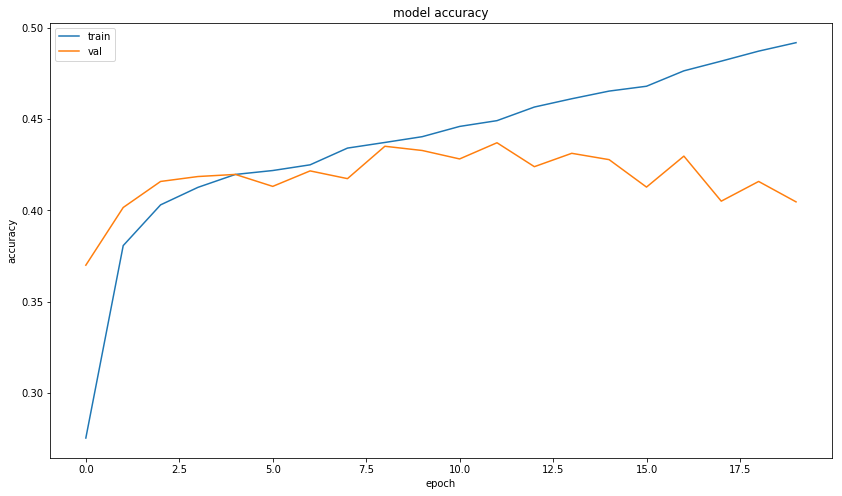

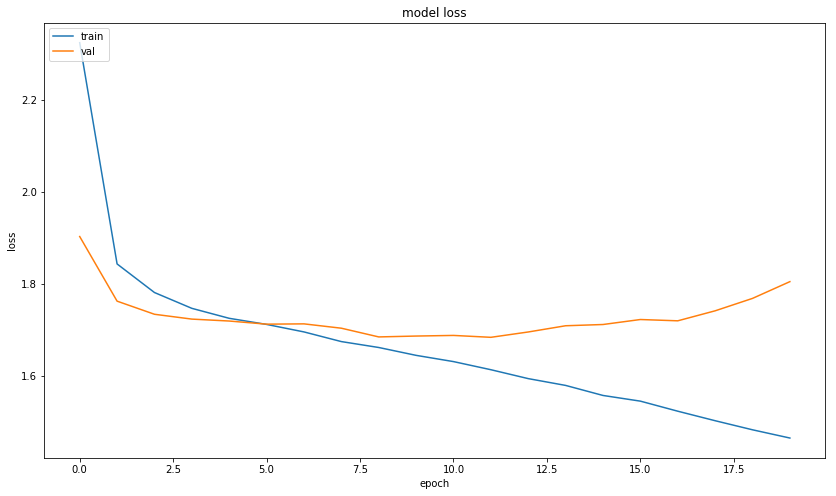

In [177]:
train_result = history3.history

print(train_result.keys())

#  "Accuracy"
plt.figure(figsize=(14,8))
plt.plot(train_result['acc'])
plt.plot(train_result['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# "Loss"
plt.figure(figsize=(14,8))
plt.plot(train_result['loss'])
plt.plot(train_result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## LSTM with Attention

### Design + Training

In [166]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')
        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)
        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)
        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]
        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)), K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim
    


In [172]:
text_data = Input(shape=(MAX_SEQ_LEN,), name='text')
meta_data = Input(shape=(3,), name = 'meta')
x = Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDING_LEN,  # Embedding size
                    weights=[embedding_index],
                    input_length=MAX_SEQ_LEN,
                    trainable=False)(text_data)
x1 = (LSTM(300, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))(x)
x2 = Dropout(0.25)(x1)
x3 = Attention(MAX_SEQ_LEN)(x2)
x4 = Dense(256, activation='relu')(x3)
x5 = Dropout(0.25)(x4)
x6 = BatchNormalization()(x5)
x7 = concatenate([x6, meta_data])
x8 = Dense(150, activation='relu')(x7)
x9 = Dropout(0.25)(x8)
x10 = BatchNormalization()(x9)
outp = Dense(len(set(y)), activation='softmax')(x10)

AttentionLSTM = Model(inputs=[text_data, meta_data ], outputs=outp)
AttentionLSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

AttentionLSTM.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               (None, 60)           0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 60, 300)      85519500    text[0][0]                       
__________________________________________________________________________________________________
lstm_6 (LSTM)                   (None, 60, 300)      721200      embedding_9[0][0]                
__________________________________________________________________________________________________
dropout_8 (Dropout)             (None, 60, 300)      0           lstm_6[0][0]                     
__________________________________________________________________________________________________
attention_

In [182]:
# draw model 
plot_model(AttentionLSTM, to_file='models/model_LSTM_attention_metaData.png', show_shapes=True)

In [173]:
# training the model
history4 = AttentionLSTM.fit([X_train_sequences, df_cat_train], y_train, 
                     validation_split=0.1, epochs=20, batch_size=128, verbose=2)

Train on 23351 samples, validate on 2595 samples
Epoch 1/20
 - 43s - loss: 2.4561 - acc: 0.2591 - val_loss: 2.1146 - val_acc: 0.2551
Epoch 2/20
 - 40s - loss: 1.9272 - acc: 0.3675 - val_loss: 1.7810 - val_acc: 0.3958
Epoch 3/20
 - 40s - loss: 1.8243 - acc: 0.3924 - val_loss: 1.7462 - val_acc: 0.4069
Epoch 4/20
 - 40s - loss: 1.7806 - acc: 0.4033 - val_loss: 1.7292 - val_acc: 0.4170
Epoch 5/20
 - 40s - loss: 1.7507 - acc: 0.4089 - val_loss: 1.7228 - val_acc: 0.4150
Epoch 6/20
 - 40s - loss: 1.7258 - acc: 0.4173 - val_loss: 1.7056 - val_acc: 0.4208
Epoch 7/20
 - 40s - loss: 1.7082 - acc: 0.4244 - val_loss: 1.6866 - val_acc: 0.4254
Epoch 8/20
 - 40s - loss: 1.6914 - acc: 0.4281 - val_loss: 1.6839 - val_acc: 0.4258
Epoch 9/20
 - 40s - loss: 1.6700 - acc: 0.4314 - val_loss: 1.7004 - val_acc: 0.4200
Epoch 10/20
 - 40s - loss: 1.6587 - acc: 0.4352 - val_loss: 1.6801 - val_acc: 0.4220
Epoch 11/20
 - 40s - loss: 1.6400 - acc: 0.4381 - val_loss: 1.7021 - val_acc: 0.4266
Epoch 12/20
 - 40s - loss

### Eval

In [174]:
score4, acc4 = AttentionLSTM.evaluate([X_test_sequences, df_cat_test], y_test, verbose=2)

print("Accuracy:", acc4)  
list_result.append(("LSTM-Attention with metadata - Testing", acc4))
list_result

Accuracy: 0.41205487893821097


[('LSTM Simple - Testing', 0.34145212),
 ('LSTM Simple - Training', 0.9220304),
 ('LSTM with metadata - Testing', 0.39525204256500834),
 ('bi-GRU with metadata - Testing', 0.40218899331622815),
 ('LSTM-Attention with metadata - Testing', 0.41205487893821097)]

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


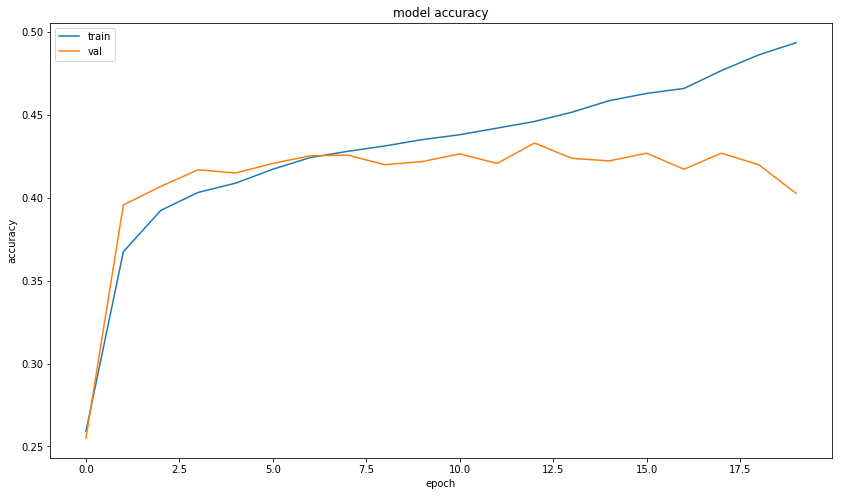

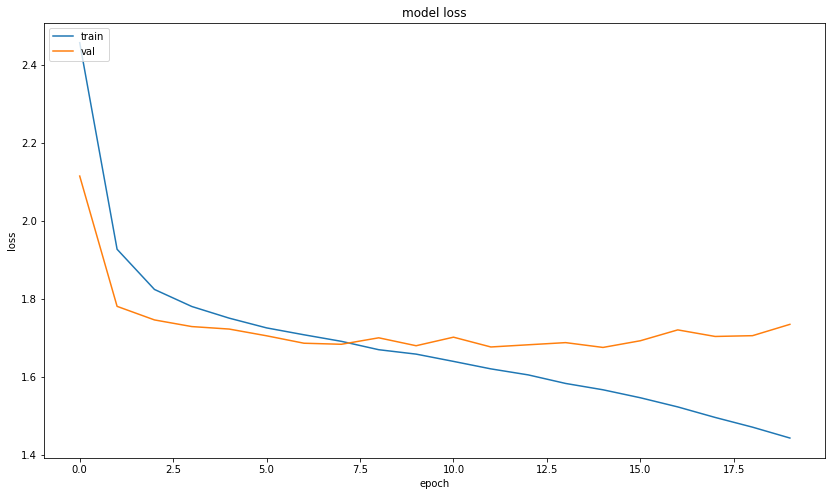

In [178]:
train_result = history4.history

print(train_result.keys())

#  "Accuracy"
plt.figure(figsize=(14,8))
plt.plot(train_result['acc'])
plt.plot(train_result['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# "Loss"
plt.figure(figsize=(14,8))
plt.plot(train_result['loss'])
plt.plot(train_result['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Model Comparison

In [175]:
pd.DataFrame(list_result, columns=['model', 'accuracy'])

,model,accuracy
0,LSTM Simple - Testing,0.341452
1,LSTM Simple - Training,0.922030
2,LSTM with metadata - Testing,0.395252
3,bi-GRU with metadata - Testing,0.402189
4,LSTM-Attention with metadata - Testing,0.412055


In [1]:
print('\nDONE !')


DONE !
